## Create a classifier to predict the wine color from wine quality attributes using this dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## The data is in the database we've been using
+ host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
+ database='training'
+ port=5432
+ user='dot_student'
+ password='qgis'
+ table name = 'winequality'

In [35]:
import pg8000
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, tree, metrics
%matplotlib inline

## Query for the data and create a numpy array

In [2]:
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', user='dot_student', password='qgis', database="training")
cursor = conn.cursor()
cursor.execute("select * from information_schema.columns where table_name='winequality'")
results = cursor.fetchall()

In [53]:
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', user='dot_student', password='qgis', database="training")
cursor = conn.cursor()
cursor.execute("select column_name from information_schema.columns where table_name='winequality'") #LIMIT 10
results = cursor.fetchall()

In [78]:
conn.rollback()

In [55]:
for x in results:
    print(x)

['fixed_acidity']
['volatile_acidity']
['citric_acid']
['residual_sugar']
['chlorides']
['free_sulfur_dioxide']
['total_sulfur_dioxide']
['density']
['ph']
['sulphates']
['alcohol']
['color']


In [79]:
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', user='dot_student', password='qgis', database="training")
cursor = conn.cursor()
db = []
cursor.execute("SELECT * from winequality")
for item in cursor.fetchall():
    db.append(item)

In [72]:
results_list = []
for y in results:
    results_list.append(y)

In [81]:
result_array = np.array(db)

## Split the data into features (x) and target (y, the last column in the table)

### Remember you can cast the results into an numpy array and then slice out what you want

In [82]:
x = result_array[:,:11]
y = result_array[:,11]

In [83]:
y

array(['W', 'W', 'W', ..., 'R', 'R', 'R'], dtype=object)

In [84]:
x

array([[Decimal('7'), Decimal('0.27'), Decimal('0.36'), ..., Decimal('3'),
        Decimal('0.45'), Decimal('8.8')],
       [Decimal('6.3'), Decimal('0.3'), Decimal('0.34'), ...,
        Decimal('3.3'), Decimal('0.49'), Decimal('9.5')],
       [Decimal('8.1'), Decimal('0.28'), Decimal('0.4'), ...,
        Decimal('3.26'), Decimal('0.44'), Decimal('10.1')],
       ..., 
       [Decimal('6.3'), Decimal('0.51'), Decimal('0.13'), ...,
        Decimal('3.42'), Decimal('0.75'), Decimal('11')],
       [Decimal('5.9'), Decimal('0.645'), Decimal('0.12'), ...,
        Decimal('3.57'), Decimal('0.71'), Decimal('10.2')],
       [Decimal('6'), Decimal('0.31'), Decimal('0.47'), ...,
        Decimal('3.39'), Decimal('0.66'), Decimal('11')]], dtype=object)

## Create a decision tree with the data

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dt = DecisionTreeClassifier()

In [89]:
dt = dt.fit(x,y)

## Run 10-fold cross validation on the model

In [90]:
from sklearn.cross_validation import cross_val_score

In [91]:
scores = cross_val_score(dt,x,y,cv=10)

In [92]:
np.mean(scores)

0.97968305026214642

## If you have time, calculate the feature importance and graph based on the code in the [slides from last class](http://ledeprogram.github.io/algorithms/class9/#21)

### Use [this tip for getting the column names from your cursor object](http://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor)

(0, 1)

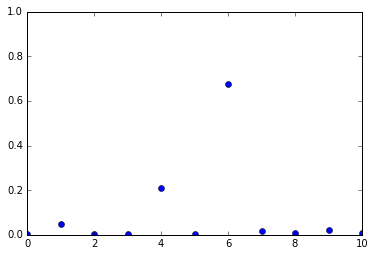

In [94]:
plt.plot(dt.feature_importances_,'o')
plt.ylim(0,1)